In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/second-hand-car-price-prediction/cars.csv


In [2]:
df = pd.read_csv('/kaggle/input/second-hand-car-price-prediction/cars.csv')

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
df = df.drop('Car_ID', axis = 1)

In [5]:
df['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [6]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [7]:
df['Model'].value_counts()

Model
Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2
E-Class          2
X3               2
A6               2
Passat           2
Thar             2
Creta            1
Swift            1
Sonata           1
Nexon            1
Scorpio          1
Polo             1
A4               1
X1               1
Endeavour        1
City             1
Harrier          1
Ertiga           1
Civic            1
Tiguan           1
Q3    

In [8]:
df['Brand'].value_counts()

Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Exploratory Data Analysis (EDA)

1. **Summary Statistics**:
   - The dataset consists of 100 entries and 13 columns.
   - The features include a mix of categorical (e.g., Brand, Fuel_Type, Transmission) and numerical variables (e.g., Year, Kilometers_Driven, Price).

2. **Missing Values**:
   - No missing values in the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

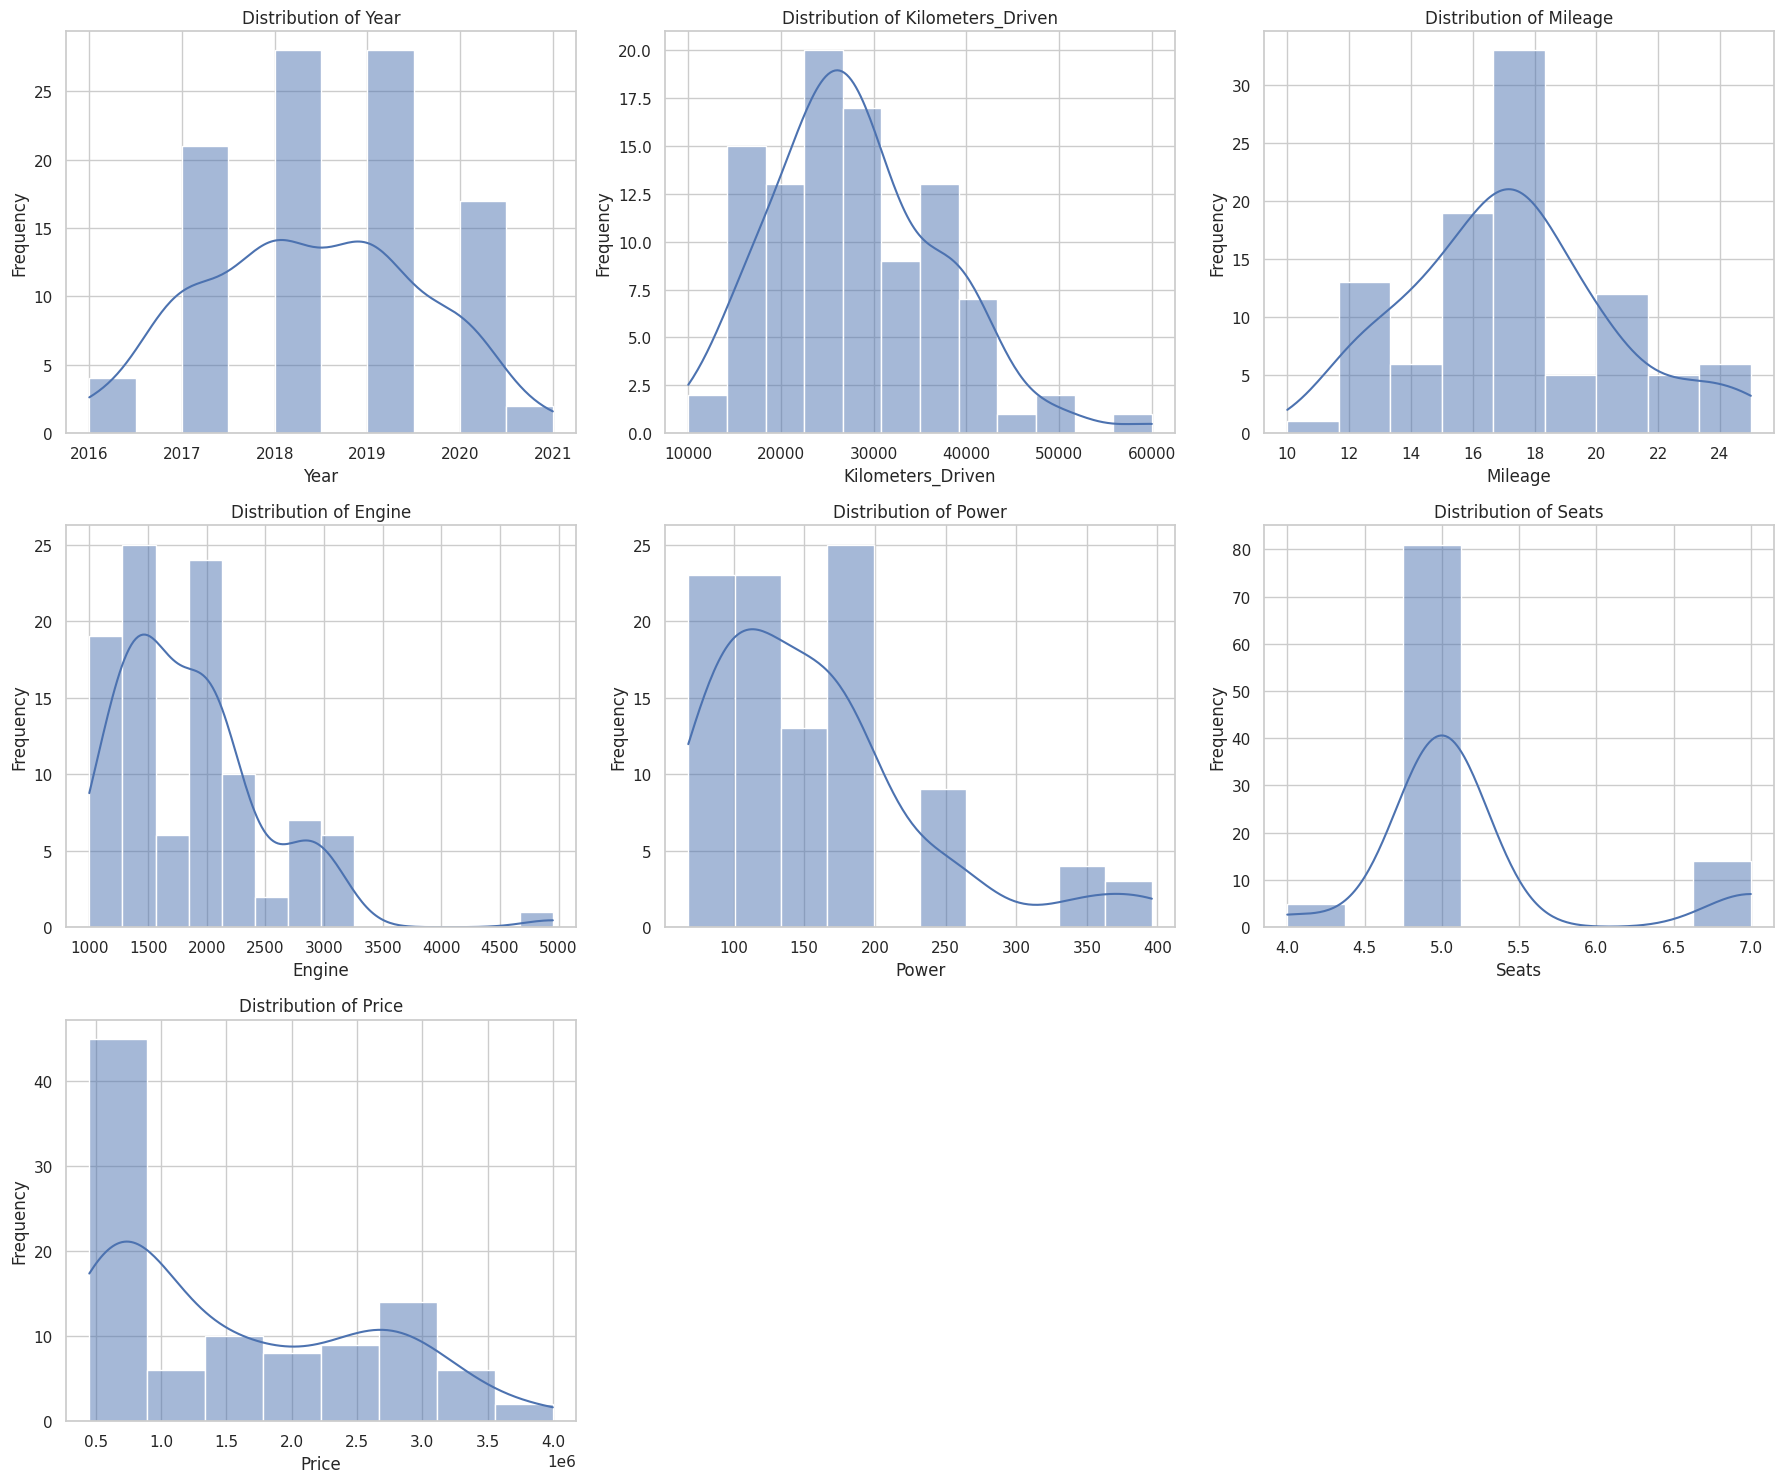

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Define numerical features
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Create histograms for numerical features
plt.figure(figsize=(18, 15))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


3. **Distribution of Numerical Features**:
   - Year: Ranges from 2016 to 2021.
   - Kilometers_Driven: Ranges from 10,000 to 60,000 km.
   - Mileage: Ranges from 10 to 25 km/l.
   - Engine: Ranges from 999 to 4951 CC.
   - Power: Ranges from 68 to 396 bhp.
   - Seats: Ranges from 4 to 7 seats.
   - Price: Ranges from 450,000 to 4,000,000 INR.


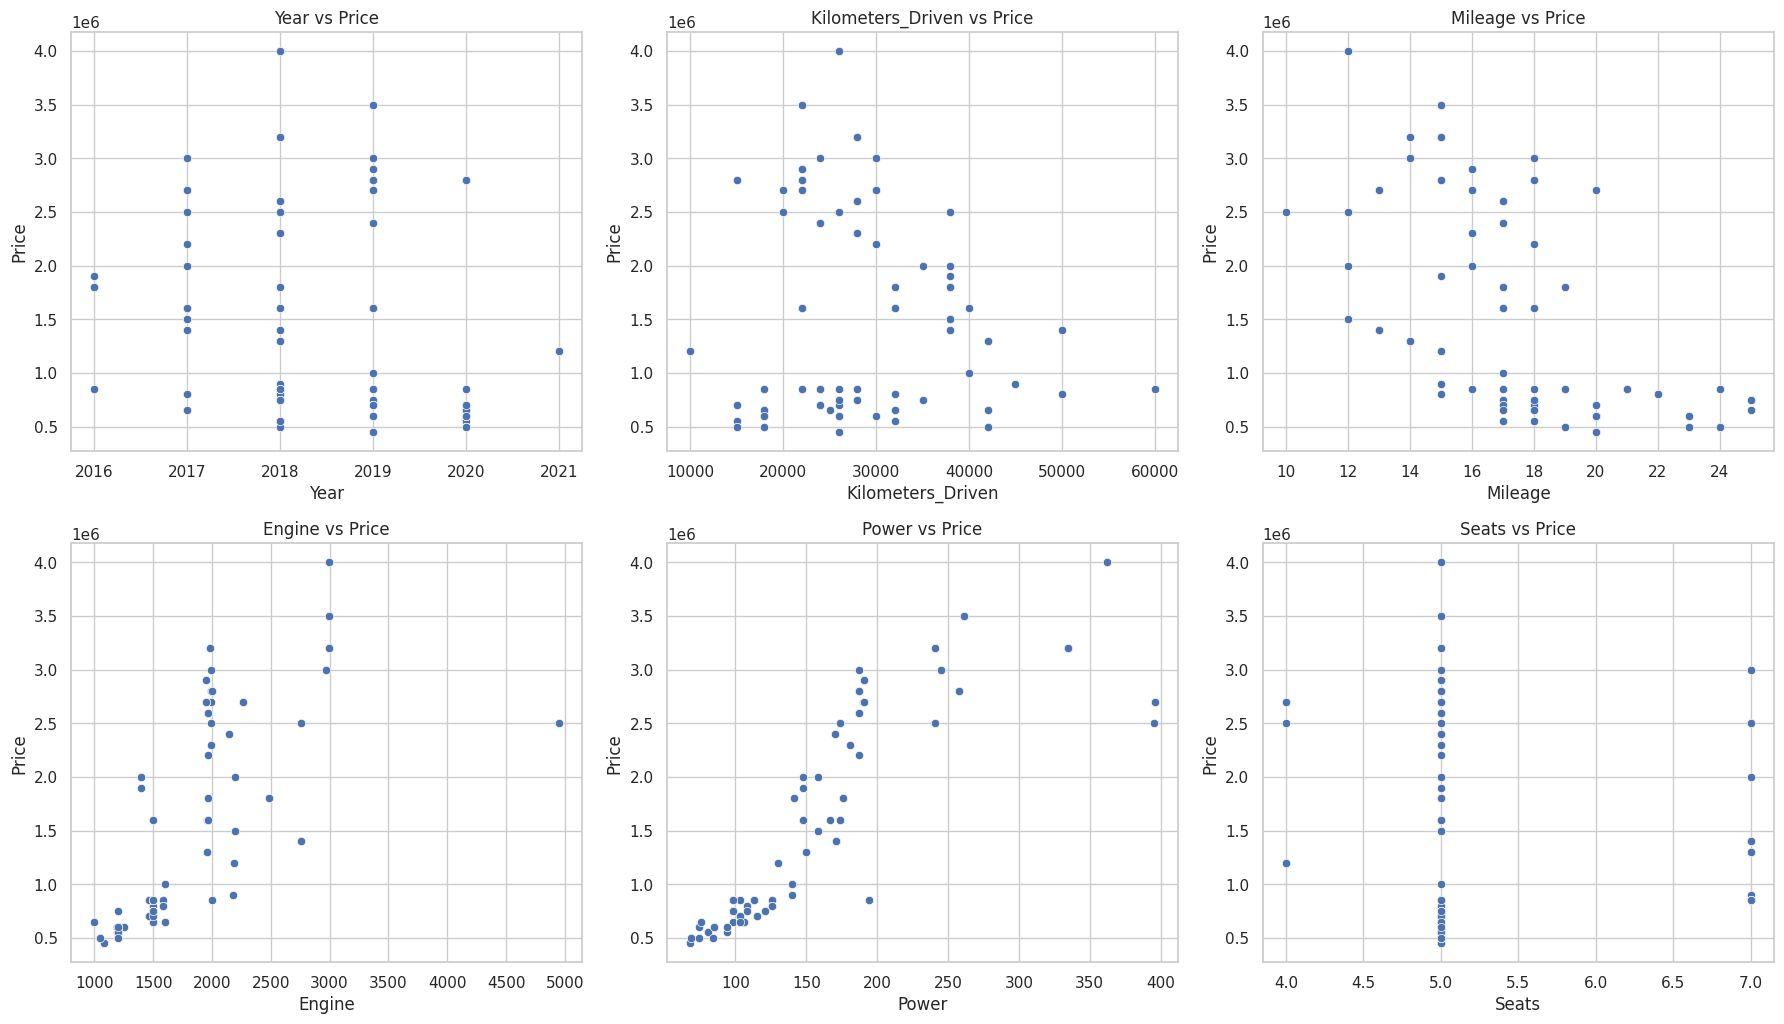

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create scatter plots for relationship with Price
plt.figure(figsize=(18, 15))

for i, feature in enumerate(numerical_features[:-1]):  # Exclude 'Price' itself
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y='Price')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


4. **Categorical Feature Analysis**:
   - Brand: Includes various car brands like Toyota, Honda, Ford, etc.
   - Fuel_Type: Includes Petrol, Diesel, Electric.
   - Transmission: Includes Manual, Automatic.
   - Owner_Type: Includes First, Second, Third.
   
5. **Feature Analysis with Price**:
   - Power and engine have a direct linear relation with Price.
   - Kilometers driven have an inverse linear relation with Price
   - Interesting observation is that overtime,there are more cars produced which are cheaper and more affordable.
 


In [16]:
# Label encode the features to use for model building
from sklearn import preprocessing

In [17]:
labelencoder = preprocessing.LabelEncoder()

In [18]:
df['Brand'] = labelencoder.fit_transform(df['Brand'])
df['Owner_Type'] = labelencoder.fit_transform(df['Owner_Type'])

In [19]:
# lets drop the model to make it simpler 
df = df.drop('Model', axis=1)

In [20]:
df['Fuel_Type'] = df['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)
df['Transmission'] = df['Transmission'].apply(lambda x:1 if x == 'Manual' else 0)

In [21]:
df.head()

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2018,50000,1,1,0,15,1498,108,5,800000
1,3,2019,40000,1,0,1,17,1597,140,5,1000000
2,2,2017,20000,1,0,0,10,4951,395,4,2500000
3,6,2020,30000,0,1,2,23,1248,74,5,600000
4,4,2016,60000,0,0,1,18,1999,194,5,850000


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns =['Price'])
y = df['Price']

In [23]:
X

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,9,2018,50000,1,1,0,15,1498,108,5
1,3,2019,40000,1,0,1,17,1597,140,5
2,2,2017,20000,1,0,0,10,4951,395,4
3,6,2020,30000,0,1,2,23,1248,74,5
4,4,2016,60000,0,0,1,18,1999,194,5
...,...,...,...,...,...,...,...,...,...,...
95,7,2019,22000,0,0,0,16,1950,191,5
96,9,2017,38000,0,1,1,13,2755,171,7
97,2,2018,26000,1,1,2,18,1497,121,5
98,4,2019,24000,1,0,1,17,1497,113,5


In [24]:
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [25]:
X_train.shape

(80, 10)

In [26]:
def fit(X_train, Y_train):
    X_train = np.insert(X_train.values,0,1,axis = 1)
    betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(Y_train)
    intercept = betas[0]
    coef = betas[1:]
    return intercept, coef

def predict(x_test):
    y_pred = np.dot(x_test,coef1) + intercept1
    return y_pred

In [27]:
intercept1 , coef1 = fit(X_train,Y_train) 

In [28]:
y_pred = predict(x_test)

In [29]:
from sklearn.metrics import r2_score
score_scratch = r2_score(y_test, y_pred)

In [30]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train,Y_train)

LinearRegression()

In [34]:
y_pred1 = reg.predict(x_test)

In [35]:
score_LR = r2_score(y_test,y_pred1)

In [36]:
print('Coefs we got using sklearn LR model:',reg.coef_)
print('Intercept we got using sklearn LR model:',reg.intercept_)
print('coeff we got from our function:',coef1)
print('intercept we got from our function:',intercept1)

Coefs we got using sklearn LR model: [-1.76909629e+04 -6.09984162e+04 -1.83423628e+01 -4.20654958e+05
 -4.36536820e+05 -8.75824123e+04 -5.86091147e+04 -3.85923914e+02
  1.00593964e+04  1.04502020e+05]
Intercept we got using sklearn LR model: 125342384.87462421
coeff we got from our function: [-1.76909629e+04 -6.09984163e+04 -1.83423628e+01 -4.20654958e+05
 -4.36536820e+05 -8.75824123e+04 -5.86091147e+04 -3.85923914e+02
  1.00593964e+04  1.04502020e+05]
intercept we got from our function: 125342384.88764954


In [37]:
print('R2 score using our model:',score_scratch)
print('R2 score using SKlearn LR model:',score_LR)

R2 score using our model: 0.7376762965328693
R2 score using SKlearn LR model: 0.737676296380006


We can make the Model better by scaling the data, but this is just to implement the model from sratch and compare it with sklearn's model